In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

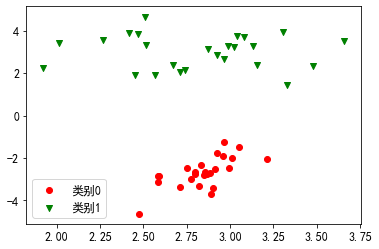

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0,
n_classes=2, class_sep=2.8, n_clusters_per_class=1, flip_y=0, random_state=11)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="r", marker="o", label="类别0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="g", marker="v", label="类别1")
plt.legend()

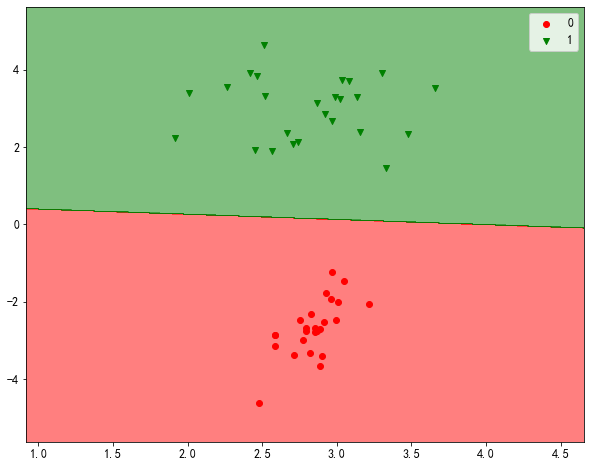

In [3]:
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

def plot_decision_boundary(model, X, y):
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    class_label = np.unique(y)
    cmap = ListedColormap(color[: len(class_label)])
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.01)
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.01)
    X1, X2 = np.meshgrid(x1, x2)
    Z = model.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.5)
    for i, class_ in enumerate(class_label):
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1], c=cmap.colors[i], label=class_, marker=marker[i])
    plt.legend()

svc = SVC(kernel="linear")
svc.fit(X, y)
plt.figure(figsize=(10, 8))
plot_decision_boundary(svc, X, y)

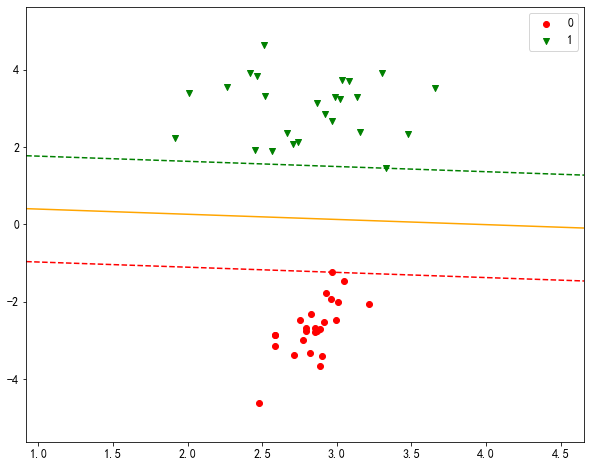

In [4]:
def plot_decision_boundary2(model, X, y):
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    class_label = np.unique(y)
    cmap = ListedColormap(color[: len(class_label)])
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.01)
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.01)
    X1, X2 = np.meshgrid(x1, x2)
    V = model.decision_function(np.c_[X1.ravel(), X2.ravel()])
    V = V.reshape(X1.shape)
    plt.contour(X1, X2, V, colors=[cmap.colors[0], "orange", cmap.colors[1]],
    levels=[-1, 0, 1], alpha=1, linestyles=["--", "-", "--"])
    for i, class_ in enumerate(class_label):
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1], c=cmap.colors[i], label=class_, marker=marker[i])
    plt.legend()

plt.figure(figsize=(10, 8))
plot_decision_boundary2(svc, X, y)